In [3]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
import seaborn as sns

In [5]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

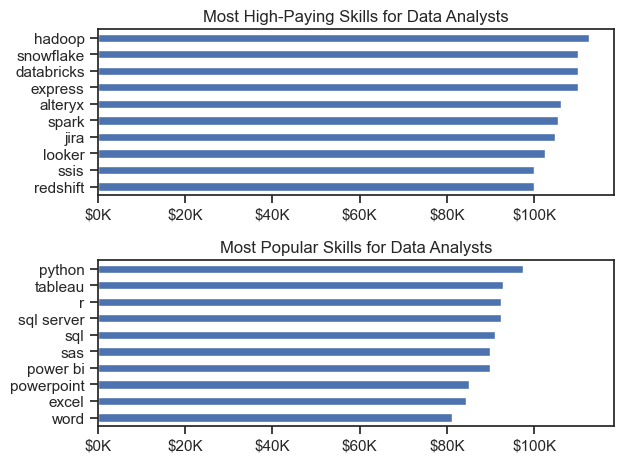

In [14]:
df_DA_US = df_DA_US.explode('job_skills')
dfdaus_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
dfdaus_group_filtered = dfdaus_group[dfdaus_group['count'] > 50]
df_toppay = dfdaus_group_filtered.sort_values(by='median', ascending=False).head(10)
df_popular = dfdaus_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)
fig, ax = plt.subplots(2, 1)

df_toppay.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Most High-Paying Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))

df_popular[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False) #[::-1] - более краткий вариант invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Most Popular Skills for Data Analysts')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))

fig.tight_layout()

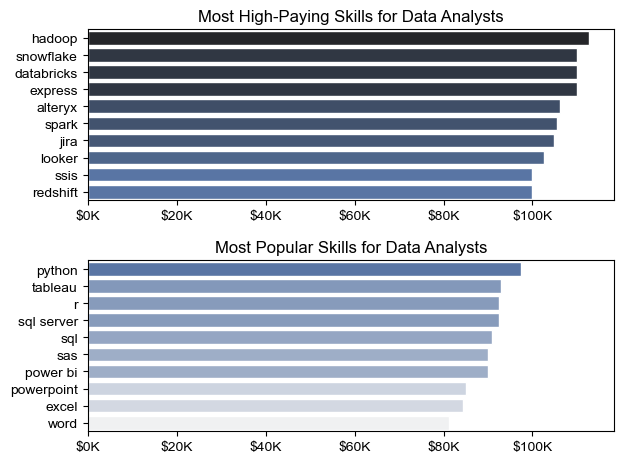

In [7]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")


sns.barplot(data=df_toppay, x='median', y=df_toppay.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)
# df_toppay.plot(kind='barh', y='median', ax=ax[0], legend=False)
# invert_yaxis()
ax[0].set_title('Most High-Paying Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))


sns.barplot(data=df_popular, x='median', y=df_popular.index, ax=ax[1], hue='median', palette='light:b', legend=False)
# df_popular[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False) #[::-1] - более краткий вариант invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Most Popular Skills for Data Analysts')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))

fig.tight_layout()
plt.show()

In [8]:
df_DA_Us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

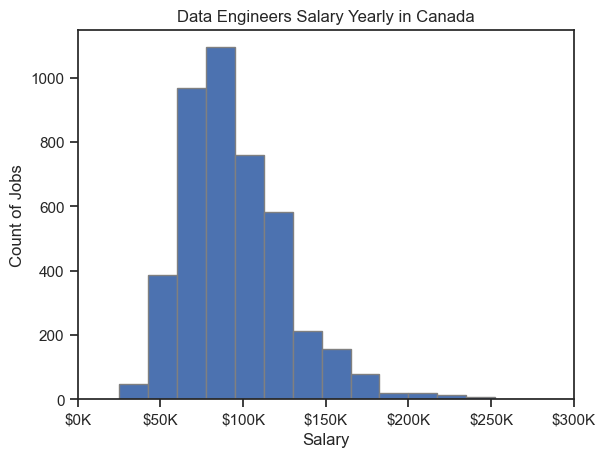

In [9]:
df_DA_Us['salary_year_avg'].plot(kind='hist', bins=20, edgecolor='gray')
plt.xlim(0, 300000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))

plt.title('Data Engineers Salary Yearly in Canada')
plt.xlabel('Salary')
plt.ylabel('Count of Jobs')
plt.show()

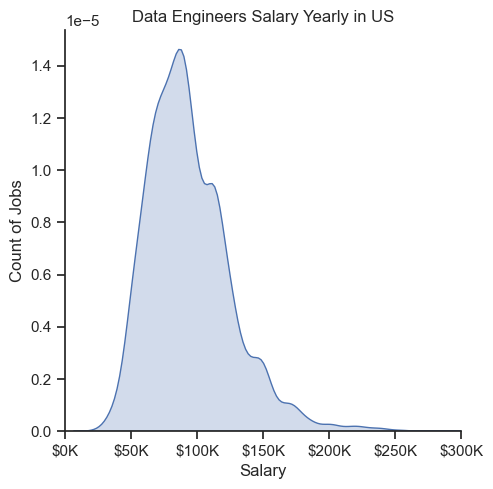

In [17]:
sns.displot(df_DA_Us['salary_year_avg'], kind='kde', fill=True)

plt.xlim(0, 300000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))

plt.title('Data Engineers Salary Yearly in US')
plt.xlabel('Salary')
plt.ylabel('Count of Jobs')
plt.show()

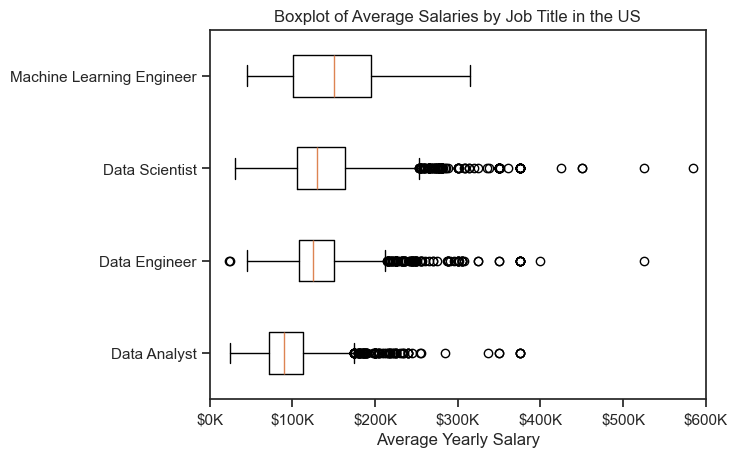

In [11]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist', 'Machine Learning Engineer']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US.dropna(subset=['salary_year_avg'], inplace=True)

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'].values for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.xlabel('Average Yearly Salary')
plt.title('Boxplot of Average Salaries by Job Title in the US')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

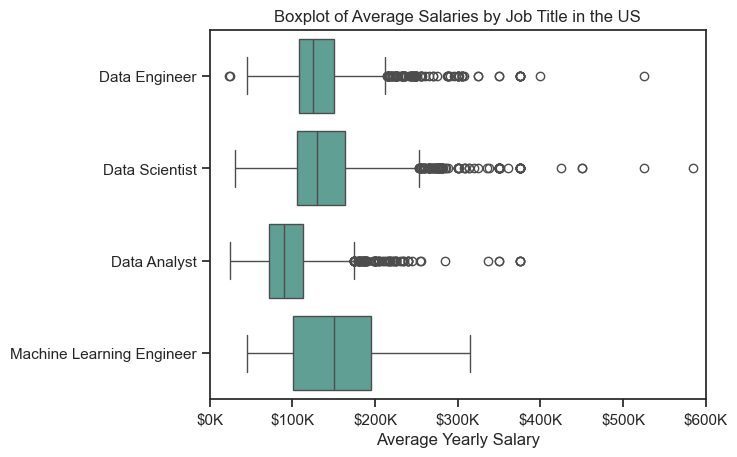

In [18]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short', hue=df_US['salary_year_avg'].median(), legend=False, palette='dark:#5A9_r')

plt.xlabel('Average Yearly Salary')
plt.ylabel('')
plt.title('Boxplot of Average Salaries by Job Title in the US')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()